In [1]:
import pandas as pd
import numpy as np

df_sans_doublons = pd.read_csv('../dataSansDoublons.csv')
df_binaire = pd.read_csv('../dataBinaire.csv')
df_log_transforme = pd.read_csv('../dataLogTransforme.csv')

Accuracy: 0.9383561643835616


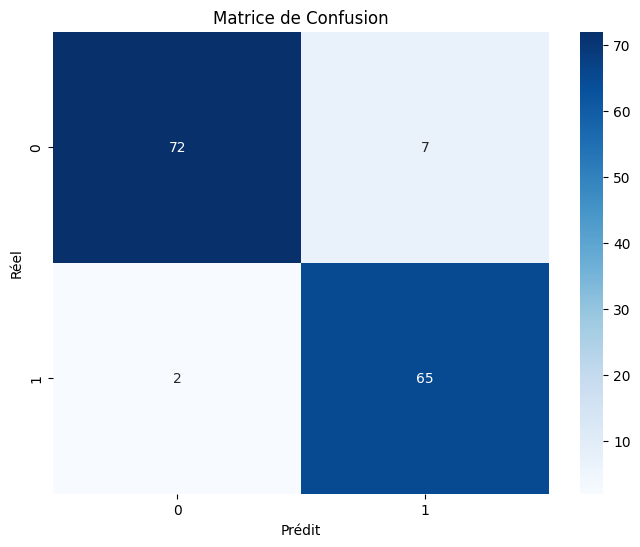


Rapport de classification:
              precision    recall  f1-score   support

    Goodware       0.97      0.91      0.94        79
  Ransomware       0.90      0.97      0.94        67

    accuracy                           0.94       146
   macro avg       0.94      0.94      0.94       146
weighted avg       0.94      0.94      0.94       146



In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Séparer en caractéristiques et cible
X = df_log_transforme.drop('Sample_Type', axis=1)
y = df_log_transforme['Sample_Type']

# Diviser en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser (important pour les réseaux neuronaux)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer le réseau neuronal
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    max_iter=1000, 
    alpha=0.0001,
    solver='adam', 
    random_state=42, 
    early_stopping=True, 
    validation_fraction=0.1
)

# Entraîner le modèle
mlp.fit(X_train_scaled, y_train)

# Prédictions
y_pred = mlp.predict(X_test_scaled)

# Évaluer le modèle
print("Accuracy:", accuracy_score(y_test, y_pred))

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

# Rapport de classification
print("\nRapport de classification:")
print(classification_report(y_test, y_pred, target_names=['Goodware', 'Ransomware']))
